# matplotlib-label-lines example

From https://github.com/cphyc/matplotlib-label-lines.

In [0]:
!pip install matplotlib-label-lines

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import loglaplace,chi2

from labellines import labelLine, labelLines

In [0]:
X = np.linspace(0, 1, 500)
A = [1, 2, 5, 10, 20]
funcs = [np.arctan, np.sin, loglaplace(4).pdf, chi2(5).pdf]

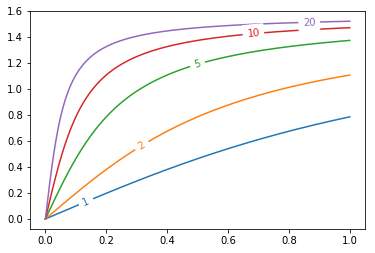

In [0]:
for a in A:
    plt.plot(X, np.arctan(a*X), label=str(a))

labelLines(plt.gca().get_lines(), zorder=2.5)

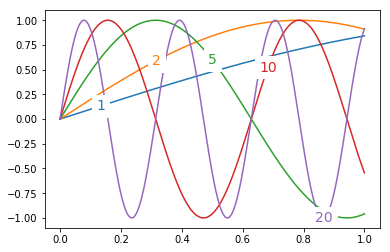

In [0]:
for a in A:
    plt.plot(X, np.sin(a*X), label=str(a))

labelLines(plt.gca().get_lines(), align=False, fontsize=14)

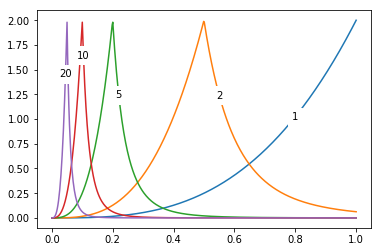

In [0]:
for a in A:
    plt.plot(X, loglaplace(4).pdf(a*X), label=str(a))

xvals = [0.8, 0.55, 0.22, 0.104, 0.045]
labelLines(plt.gca().get_lines(), align=False, xvals=xvals, color='k')

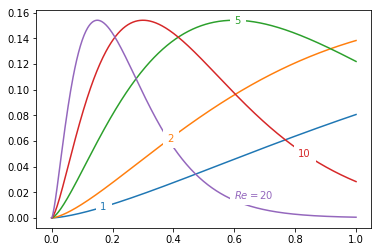

In [0]:
for a in A:
    plt.plot(X, chi2(5).pdf(a*X), label=str(a))

lines = plt.gca().get_lines()
l1=lines[-1]
labelLine(l1, 0.6, label=r'$Re=${}'.format(l1.get_label()), ha='left',
          va='bottom', align=False)
labelLines(lines[:-1], align=False)

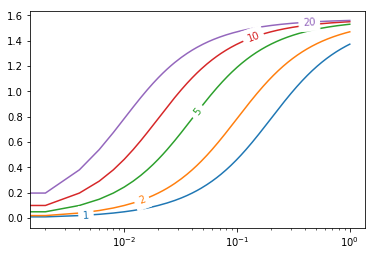

In [0]:
for a in A:
    plt.semilogx(X, np.arctan(5*a*X), label=str(a))

labelLines(plt.gca().get_lines(), zorder=2.5)

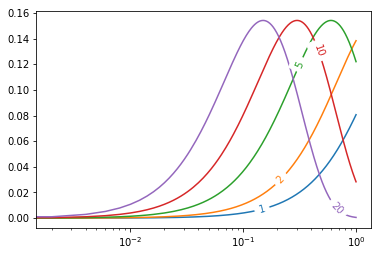

In [0]:
for a in A:
    plt.semilogx(X, chi2(5).pdf(a*X), label=str(a))

labelLines(plt.gca().get_lines(), xvals=(0.1, 1), zorder=2.5)